In [1]:
cd /v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/bows+punctuation/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/bows+punctuation


In [34]:
cd /v/filer4b/v20q001/npockrus/NLP/finalProject/venv/src/irony-classifier/data/conservative/features/bows+punctuation/

/v/filer4b/v20q001/npockrus/NLP/finalProject/venv/src/irony-classifier/data/conservative/features/bows+punctuation


# Load Comments 

In [35]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)
    
with open('vectorizer.p', 'r') as f:
    vectorizer = pickle.load(f)

In [36]:
# Load comments, labels, and bow vectors
xs = np.array([ comment for comment in sorted(data) ])
ys = np.array([ data[comment]['label'] for comment in sorted(data) ])

X = scipy.sparse.vstack([ data[comment]['bow'] for comment in sorted(data) ])

print xs

['\n\n\nBecause evil always triumphs in the end.' '\n\n\nno.'
 "\n\n\noh and please don't correct my post of the improper use of capitalization because [that be racist! PUNCxEXCLAMATION_POINT"
 "\n\n$10 dollars an hour isn't that much."
 '\n\n&amp;nbsp;\n\n\nEDIT: The good news is, [the Senate looks to be making better progress.'
 '\n\n&gt;...' '\n\n&gt;5.'
 '\n\n&gt;Cook said, \xe2\x80\x9cI feel the punishment should match the outrage felt by this community. PUNCxUPPERCASE'
 '\n\n&gt;Dr. PUNCxEMOTICON'
 '\n\n&gt;Perhaps it won\xe2\x80\x99t go down. PUNCxEMOTICON'
 '\n\n&gt;Speaking to the BIMS majors in the class, she noted that the study of religion has more grey areas than they might be used to in some of their other courses, and advised trying to accept those ambiguities. PUNCxUPPERCASE'
 '\n\n* His salary is set by 4 other Mega-Church Pastors.'
 '\n\n****\n\nCliff Frohlich, [Two-Year Survey Comparing Earthquake Activity and Injection-Well Locations in the Barnett Shale, Texas](htt

# 5-Fold Test

In [41]:
from sklearn.cross_validation import KFold

kf = KFold(len(xs), n_folds=10, shuffle=True)

# Predictions

In [42]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier

recalls, precisions, f_measures = [], [], []
for train, test in kf:
    # Train svm
    svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto", alpha=.01)
    parameters = { 'alpha': [.001, .01,  .1] }
    clf = GridSearchCV(svm, parameters, scoring='f1')
    clf.fit(X[train], ys[train])

    # Make predictions
    predictions = clf.predict(X[test])
    
    for test, vector, prediction, actual in zip(xs[test], X[test], predictions, ys[test]):
        print '========================================================================'
        print
        print 'Comment: {}'.format(test)
        print 'Vectorized as: {}'.format(vector)
        print 'Prediction: {}'.format(prediction)
        print 'Was really: {}'.format(actual)
        print


Comment: 

&gt;...
Vectorized as:   (0, 2901)	1
Prediction: -1
Was really: -1


Comment: 

And saying that *"Condoms are only 95% effective.
Vectorized as:   (0, 166)	1
  (0, 1334)	1
  (0, 5942)	1
  (0, 165)	1
  (0, 1333)	1
  (0, 2095)	1
  (0, 5941)	1
Prediction: -1
Was really: -1


Comment: 

Another couple hundred dollars.
Vectorized as:   (0, 1528)	1
  (0, 1943)	1
  (0, 1527)	1
Prediction: -1
Was really: -1


Comment: 

Hopefully one day there'll be a Dutch revival and it'll be reclaimed as a place if worship.
Vectorized as:   (0, 4977)	1
  (0, 5564)	1
  (0, 3964)	1
  (0, 5765)	1
  (0, 2042)	1
  (0, 3961)	1
  (0, 1627)	1
  (0, 3174)	1
  (0, 5563)	1
  (0, 5764)	1
  (0, 2041)	1
  (0, 7581)	1
  (0, 3172)	1
  (0, 3955)	1
  (0, 1624)	1
  (0, 4971)	1
Prediction: -1
Was really: -1


Comment: 

It was awful.
Vectorized as:   (0, 580)	1
Prediction: -1
Was really: -1


Comment: 

It's a serious question 
Vectorized as:   (0, 5409)	1
Prediction: -1
Was really: -1


Comment: 

Neuroscience and

# Most Indicative Features

In [43]:
sgd_clf = clf.best_estimator_
feat_names = vectorizer.get_feature_names()
coefs_with_fns = sorted(zip(sgd_clf.coef_[0], feat_names))
coefs_with_fns[:20]

[(-0.6387553606821349, u'puncxuppercase'),
 (-0.59164304419957559, u'com'),
 (-0.5259049281774002, u'gt'),
 (-0.52042675184222176, u'puncxquestion_mark'),
 (-0.50399222283667533, u'time'),
 (-0.46181026505577927, u'like'),
 (-0.41634140147377513, u'way'),
 (-0.39442869613305043, u'needs'),
 (-0.37251599079232528, u'article'),
 (-0.37251599079232528, u'help'),
 (-0.37251599079232528, u'liberal'),
 (-0.37251599079232528, u'stop'),
 (-0.37251599079232517, u'does'),
 (-0.3506032854516003, u'amp'),
 (-0.35060328545160024, u'http'),
 (-0.35060328545160008, u'going'),
 (-0.35060328545160008, u'likely'),
 (-0.35060328545159986, u'want'),
 (-0.3506032854515998, u'god'),
 (-0.33362093881254051, u'puncxexclamation_point')]

In [20]:
coefs_with_fns[-20:]

[(0.2537213044090858, u'people think'),
 (0.2537213044090858, u'virtual'),
 (0.25372130440908586, u'war'),
 (0.25372130440908586, u'war peace'),
 (0.25372130440908586, u'yesterday'),
 (0.25372130440908586, u'yesterday puncxquestion_mark'),
 (0.25372130440908591, u'domestic policy'),
 (0.25372130440908591, u'don say'),
 (0.25372130440908591, u'just domestic'),
 (0.25372130440908591, u'say puncxexclamation_point'),
 (0.25372130440908597, u'bravo'),
 (0.25372130440908597, u'getting scary'),
 (0.25372130440908597, u'mmmm'),
 (0.25372130440908597, u'okay'),
 (0.25372130440908597, u'okay getting'),
 (0.25372130440908597, u'wow'),
 (0.25372130440908602, u'sarc'),
 (0.2649022432474521, u'american'),
 (0.30446556529090291, u'shock'),
 (0.35520982617272029, u'peace')]

# Performance

## Byron's Results: Precision=0.315 (0.261, 0.380), Recall=0.496 (0.446, 0.548), F-Measure=0.383 (0.330, 0.412)

In [47]:
import sklearn

precisions, recalls, f_measures = [], [], []
for train, test in kf:
    # Train svm
    svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto")
    parameters = { 'alpha': [.001, .01,  .1] }
    clf = GridSearchCV(svm, parameters, scoring='f1')
    clf.fit(X[train], ys[train])

    # Make predictions
    predictions = clf.predict(X[test])
    
    # Record statistics
    precision, recall, f_measure, _ = sklearn.metrics.precision_recall_fscore_support(ys[test], predictions, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f_measures.append(f_measure)

print 'Precisions: {}'.format(precisions)
print 'Recalls: {}'.format(recalls)
print 'F-Measures: {}'.format(f_measures)
print
print 'Mean Precision: {}'.format(np.mean(precisions))
print 'Mean Recall: {}'.format(np.mean(recalls))
print 'Mean F-Measure: {}'.format(np.mean(f_measures))

Precisions: [0.0, 0.18181818181818182, 0.0, 0.0, 0.076923076923076927, 0.090909090909090912, 0.0, 0.10000000000000001, 0.1111111111111111, 0.33333333333333331]
Recalls: [0.0, 0.33333333333333331, 0.0, 0.0, 0.33333333333333331, 0.16666666666666666, 0.0, 0.125, 0.20000000000000001, 0.2857142857142857]
F-Measures: [0.0, 0.23529411764705885, 0.0, 0.0, 0.125, 0.11764705882352942, 0.0, 0.11111111111111112, 0.14285714285714285, 0.30769230769230765]

Mean Precision: 0.0894094794095
Mean Recall: 0.144404761905
Mean F-Measure: 0.103960173813


# Learning Curves

In [23]:
import sklearn

rows, performances = (np.shape(X[train])[0], {})
ms = range(100, rows, 100) + [rows]  # ms = (1, 100, 200, ..., 1200, 1229)
for m in ms:
    
    precisions, recalls, f_measures = [], [], []
    for train, test in kf:
        # Train svm
        svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto")
        parameters = { 'alpha': [.001, .01,  .1] }
        clf = GridSearchCV(svm, parameters, scoring='f1')
        clf.fit(X[train[:m]], ys[train[:m]])

        # Make predictions
        predictions = clf.predict(X[test])

        # Record statistics
        precision, recall, f_measure, _ = sklearn.metrics.precision_recall_fscore_support(ys[test], predictions, average='binary')
        precisions.append(precision)
        recalls.append(recall)
        f_measures.append(f_measure)

    performances[m] = (np.mean(precisions), np.mean(recalls), np.mean(f_measures))

/v/filer4b/v20q001/npockrus/NLP/finalProject/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
precisions = [ performances[m][0] for m in sorted(performances) ]
recalls =    [ performances[m][1] for m in sorted(performances) ]
f_measures = [ performances[m][2] for m in sorted(performances) ]

# Plot

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

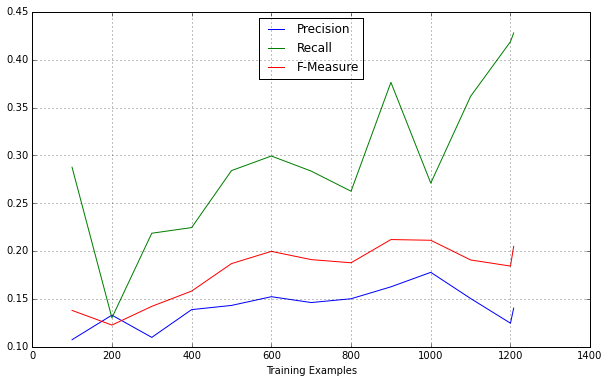

In [20]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)

labels = ['Precision', 'Recall', 'F-Measure']
metrics = [precisions, recalls, f_measures]

for metric, label in zip(metrics, labels):
    axes.plot(ms, metric, label=label)
    
plt.xlabel('Training Examples')
plt.grid(True)

axes.legend(loc='upper center')

plt.show()